<a href="https://colab.research.google.com/github/camilamurillo1/Regresion-Lineal/blob/main/Act6_2_Lineal_M%C3%BAltiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pais Mexico

- Sara Ibarra Reyes A01734979
- Brenda Villa Campos A0173223
- Camila Murillo A00828860

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df= pd.read_csv("nulosMexicoRegresion.csv")
df=df.drop(["Unnamed: 0"], axis=1)
df

,Predicciones,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,93.583622,https://www.airbnb.com/rooms/2056638,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/28353712/4379...,https://www.airbnb.com/users/show/10531228,Maria,...,5.00,4.95,5.00,4.86,0.0,3.0,3.0,0.0,0.0,0.19
1,93.583622,https://www.airbnb.com/rooms/2072354,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,https://www.airbnb.com/users/show/16840050,Mónica,...,4.93,5.00,4.95,4.84,0.0,2.0,2.0,0.0,0.0,0.54
2,93.583622,https://www.airbnb.com/rooms/696037,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,...,4.92,4.92,4.58,4.71,0.0,3.0,3.0,0.0,0.0,0.31
3,93.583622,https://www.airbnb.com/rooms/35797,2023-03-29,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,Dici,...,4.92,4.92,4.58,4.71,0.0,1.0,1.0,0.0,0.0,0.31
4,93.583622,https://www.airbnb.com/rooms/44616,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,"Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,Condesa Haus Bed & Breakfast CDMX,...,4.87,4.78,4.98,4.48,0.0,12.0,3.0,2.0,0.0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24221,93.583622,https://www.airbnb.com/rooms/853923589855678923,2023-03-30,city scrape,Rincón Mexico lindo!,Este lugar tiene una ubicación estratégica: ll...,En el corazón de la Condesa,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/488030249,Ana,...,5.00,5.00,5.00,5.00,0.0,2.0,2.0,0.0,0.0,1.00
24222,93.583622,https://www.airbnb.com/rooms/853966732274073000,2023-03-29,city scrape,Departamento en zona diamante.,"Ubicado en zona diamante, junto al aeropuerto,...",En el corazón de la Condesa,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/506816029,Jacqueline Vivian,...,5.00,5.00,5.00,5.00,0.0,1.0,1.0,0.0,0.0,1.00
24223,93.583622,https://www.airbnb.com/rooms/854225071295768399,2023-03-29,city scrape,Habitación privada en magnífica casa,Relájate en este espacio muy tranquilo y elega...,En el corazón de la Condesa,https://a0.muscache.com/pictures/db71951a-8696...,https://www.airbnb.com/users/show/154670560,Aroa,...,5.00,5.00,5.00,5.00,0.0,1.0,0.0,1.0,0.0,1.00
24224,93.583622,https://www.airbnb.com/rooms/854247693069190865,2023-03-30,city scrape,Espacioso y luminoso loft - Roma,What else does it come with?<br />- WIFI 100MB...,En el corazón de la Condesa,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/7799414,Tiane,...,5.00,5.00,5.00,5.00,0.0,13.0,13.0,0.0,0.0,1.00


In [14]:
df["room_type"].value_counts()

Entire home/apt    15601
Private room        8201
Shared room          293
Hotel room           127
1.0                    2
Name: room_type, dtype: int64

In [ ]:
filtro1=df["room_type"]=="Private room"
p=df[filtro1]
p

In [ ]:
filtro2=df["room_type"]=="Shared room"
l=df[filtro2]
l

##Primera variable “host_acceptance_rate vs host_response_rate, Price, number_of_reviews , review_scores_rating”


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

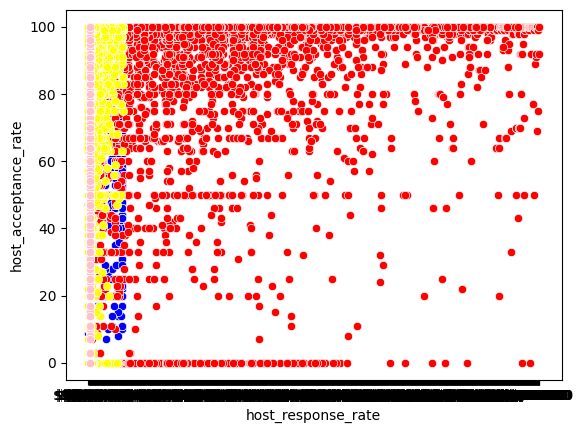

In [17]:
from turtle import color

sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=p)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=p)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="yellow", data=p)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="pink", data=p)

In [40]:
#p["price"] = p["price"].str.replace(',','')
#p["price"]= p["price"].str.lstrip('$').astype('float')
p["price"]

7        1089.0
16        726.0
17        375.0
18       2835.0
21       1244.0
          ...  
24202    1280.0
24215     750.0
24217     600.0
24220     251.0
24223     533.0
Name: price, Length: 8201, dtype: float64

In [46]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= p[['host_response_rate', 'price','number_of_reviews', "review_scores_rating"]]
Var_Dep= p['host_acceptance_rate']

In [47]:
Vars_Indep["price"]=Vars_Indep["price"].str.replace(',','')
Vars_Indep["price"]= Vars_Indep["price"].str.lstrip('$').astype('float')

AttributeError: ignored

In [59]:
Vars_Indep= p[['host_response_rate', 'price','number_of_reviews', "review_scores_rating"]]
Var_Dep= p['host_acceptance_rate']

In [60]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [61]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [62]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [63]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'price', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 3.57247275e-01,  1.51940125e-06,  1.22128530e-01, -4.17070068e+00]),
 'rank_': 4,
 'singular_': array([2.16083020e+06, 2.20671004e+03, 1.82817475e+03, 1.64152892e+01]),
 'intercept_': 73.13485479668445}

**Modelo matemático: y= 0.62534291x1 + 0.01978015x2 + 0.81582765x3 + 1.2098448339476615**

In [64]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.1310478489364223

In [67]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=p[['host_response_rate', 'price', 'number_of_reviews', "review_scores_rating"]])
y_pred

#host_response_rate, Price, number_of_reviews , review_scores_rating”

array([95.91335843, 86.08802703, 55.39498422, ..., 88.00699051,
       88.00646024, 88.00688871])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
p.insert(0, 'Predicciones1', y_pred)
p

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

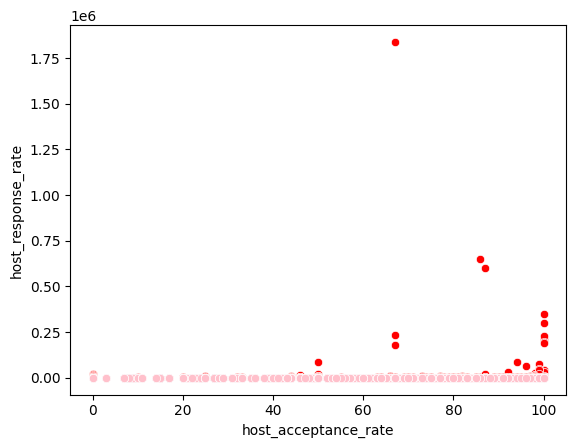

In [70]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="blue", data=p)
sns.scatterplot(x='host_acceptance_rate', y='price', color="red", data=p)
sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews', color="yellow", data=p)
sns.scatterplot(x='host_acceptance_rate', y='review_scores_rating', color="purple", data=p)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones1', color="pink", data=p)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [71]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.1310478489364223

In [72]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.36200531617149256

Primera variable df "l"

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

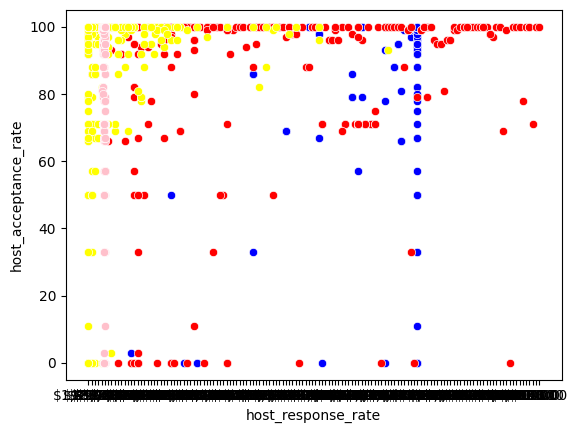

In [73]:
from turtle import color

sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=l)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=l)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="yellow", data=l)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="pink", data=l)

In [139]:
l["price"]=l["price"].str.replace(',','')
l["price"]= l["price"].str.lstrip('$').astype('float')

<ipython-input-139-2313b7f8f095>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l["price"]=l["price"].str.replace(',','')
<ipython-input-139-2313b7f8f095>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l["price"]= l["price"].str.lstrip('$').astype('float')


In [140]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= l[['host_response_rate', 'price','number_of_reviews', "review_scores_rating"]]
Var_Dep= l['host_acceptance_rate']

In [137]:
Vars_Indep= l[['host_response_rate', 'price','number_of_reviews', "review_scores_rating"]]
Var_Dep= l['host_acceptance_rate']

In [141]:
Vars_Indep.info

<bound method DataFrame.info of        host_response_rate   price  number_of_reviews  review_scores_rating
174                 100.0  1815.0                0.0                  4.75
437                  50.0   182.0                9.0                  5.00
443                  90.0   450.0               70.0                  4.83
472                 100.0   272.0               25.0                  4.40
499                 100.0   320.0               20.2                  4.58
...                   ...     ...                ...                   ...
23735               100.0   250.0                0.0                  5.00
23764               100.0   224.0                0.0                  5.00
23896               100.0   720.0                0.0                  5.00
23900               100.0   176.0                0.0                  5.00
24175               100.0   236.0                0.0                  5.00

[293 rows x 4 columns]>

In [142]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [143]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [144]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [145]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'price', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 3.63653103e-01,  1.27209748e-03,  3.06538164e-01, -1.03345323e+01]),
 'rank_': 4,
 'singular_': array([4.36992944e+04, 4.44018526e+02, 2.23392193e+02, 3.22755837e+00]),
 'intercept_': 98.28557938831955}

**Modelo matemático: y= 0.62534291x1 + 0.01978015x2 + 0.81582765x3 + 1.2098448339476615**

In [146]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.18003692056116682

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: 
y_pred= model.predict(X=l[['host_response_rate', 'price', 'number_of_reviews', "review_scores_rating"]])
y_pred


In [ ]:
#Insertamos la columna de predicciones en el DataFrame
l.insert(0, 'Predicciones1', y_pred)
l

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

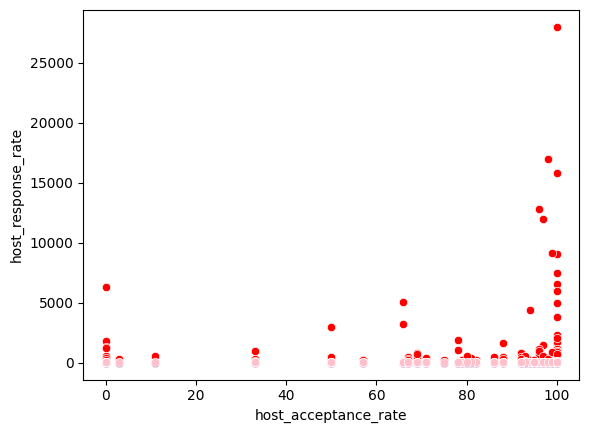

In [149]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="blue", data=l)
sns.scatterplot(x='host_acceptance_rate', y='price', color="red", data=l)
sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews', color="yellow", data=l)
sns.scatterplot(x='host_acceptance_rate', y='review_scores_rating', color="purple", data=l)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones1', color="pink", data=l)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [150]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.18003692056116682

In [151]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.4243075777795712

##Segunda variable: "Price” vs availability_365, host_response_rate, number_of_reviews, accommodates"

<Axes: xlabel='availability_365', ylabel='price'>

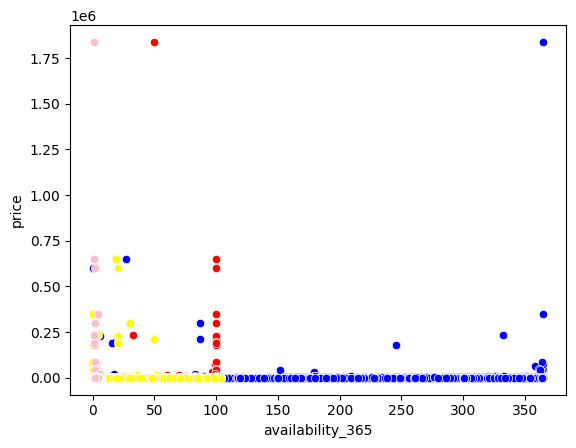

In [152]:
from turtle import color

sns.scatterplot(x='availability_365', y='price', color="blue", data=p)
sns.scatterplot(x='host_response_rate', y='price', color="red", data=p)
sns.scatterplot(x='number_of_reviews', y='price', color="yellow", data=p)
sns.scatterplot(x='accommodates', y='price', color="pink", data=p)

In [153]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= p[['host_response_rate', 'availability_365','number_of_reviews', "accommodates"]]
Var_Dep= p['price']

In [154]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [155]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [156]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [157]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'availability_365', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([-12.34246117,  -1.45556657, -11.22214262,  47.96803475]),
 'rank_': 4,
 'singular_': array([11333.89554363,  2205.01780625,  1824.92041279,    79.79500794]),
 'intercept_': 3076.699027297085}

**Modelo matemático: y= 0.62534291x1 + 0.01978015x2 + 0.81582765x3 + 1.2098448339476615**

In [158]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.00032787460217464925

In [159]:
#Predecimos los valores de total de accidentes a partir de las variables: 
y_pred= model.predict(X=p[['host_response_rate', 'availability_365', 'number_of_reviews', "accommodates"]])
y_pred


array([ 998.08095325, 1477.33221296, 2655.17544262, ..., 1436.21851266,
       1408.5627478 , 1676.38699697])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
p.insert(0, 'Predicciones2', y_pred)
p

<Axes: xlabel='price', ylabel='host_response_rate'>

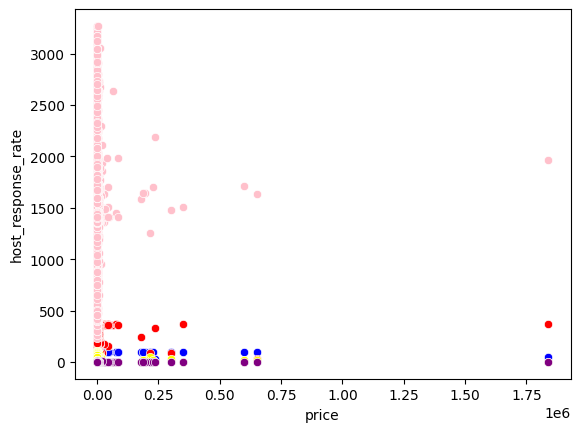

In [161]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='price', y='host_response_rate', color="blue", data=p)
sns.scatterplot(x='price', y='availability_365', color="red", data=p)
sns.scatterplot(x='price', y='number_of_reviews', color="yellow", data=p)
sns.scatterplot(x='price', y='accommodates', color="purple", data=p)
sns.scatterplot(x='price', y='Predicciones2', color="pink", data=p)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [162]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.00032787460217464925

In [163]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.01810730797701992

Segunda variable: df "l"

<Axes: xlabel='host_response_rate', ylabel='price'>

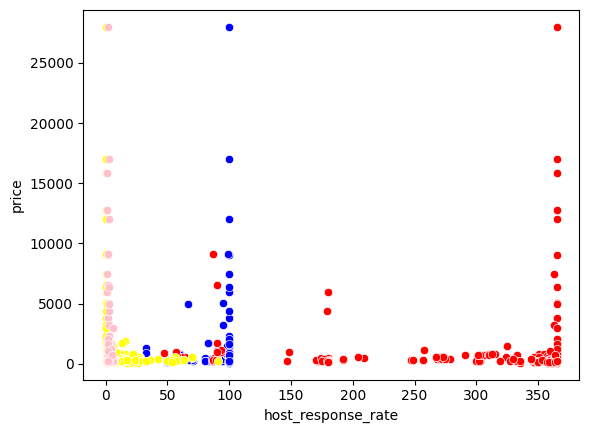

In [164]:
from turtle import color

sns.scatterplot(x='host_response_rate', y='price', color="blue", data=l)
sns.scatterplot(x='availability_365', y='price', color="red", data=l)
sns.scatterplot(x='number_of_reviews', y='price', color="yellow", data=l)
sns.scatterplot(x='accommodates', y='price', color="pink", data=l)

In [165]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= l[['host_response_rate', 'availability_365','number_of_reviews', "accommodates"]]
Var_Dep= l['price']

In [166]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [167]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [168]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [169]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'availability_365', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ -7.71416369,   0.33372797, -19.79475189,  71.09760635]),
 'rank_': 4,
 'singular_': array([1834.5589709 ,  446.07284359,  224.29674212,   23.74080796]),
 'intercept_': 1504.2902691420786}

**Modelo matemático: y= 0.62534291x1 + 0.01978015x2 + 0.81582765x3 + 1.2098448339476615**

In [170]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.021869121688886772

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: 
y_pred= model.predict(X=l[['host_response_rate', 'availability_365', 'number_of_reviews', "accommodates"]])
y_pred


In [ ]:
#Insertamos la columna de predicciones en el DataFrame
l.insert(0, 'Predicciones2', y_pred)
l

<Axes: xlabel='price', ylabel='host_response_rate'>

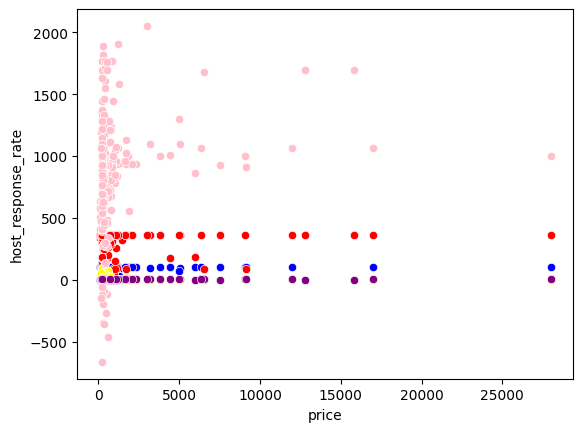

In [173]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='price', y='host_response_rate', color="blue", data=l)
sns.scatterplot(x='price', y='availability_365', color="red", data=l)
sns.scatterplot(x='price', y='number_of_reviews', color="yellow", data=l)
sns.scatterplot(x='price', y='accommodates', color="purple", data=l)
sns.scatterplot(x='price', y='Predicciones2', color="pink", data=l)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [174]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.021869121688886772

In [175]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.1478821209236829

##Tercera variable: "host_acceptance_rate vs number_of_reviews,review_scores_cleanliness,review_scores_communication"

<Axes: xlabel='number_of_reviews', ylabel='host_response_rate'>

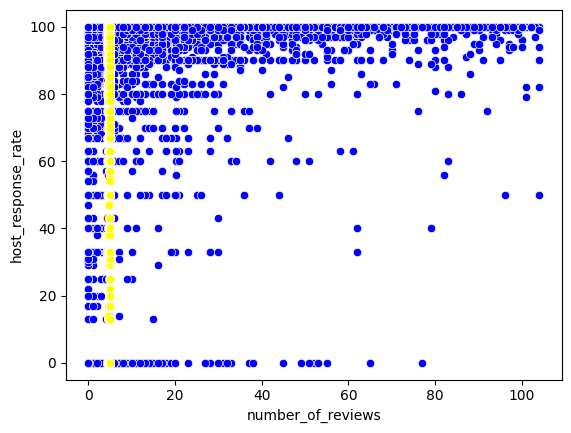

In [177]:
from turtle import color

sns.scatterplot(x='number_of_reviews', y='host_response_rate', color="blue", data=p)
sns.scatterplot(x='review_scores_cleanliness', y='host_response_rate', color="red", data=p)
sns.scatterplot(x='review_scores_communication', y='host_response_rate', color="yellow", data=p)

In [178]:
Vars_Indep= p[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']]
Var_Dep= p['host_acceptance_rate']

In [179]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [180]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [181]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [182]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.17697683, -2.04858655, -8.66552378]),
 'rank_': 3,
 'singular_': array([1916.46842796,   16.43483372,    8.11735096]),
 'intercept_': 137.1951828374105}

**Modelo matemático: y= 0.62534291x1 + 0.01978015x2 + 0.81582765x3 + 1.2098448339476615**

In [183]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.026136174371257925

In [184]:
#Predecimos los valores de total de accidentes a partir de las variables: 
y_pred= model.predict(X=p[['number_of_reviews', 'review_scores_cleanliness', 'review_scores_communication']])
y_pred


array([95.23532932, 88.38544215, 87.06205471, ..., 83.6246312 ,
       83.6246312 , 83.6246312 ])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
p.insert(0, 'Predicciones3', y_pred)
p

<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

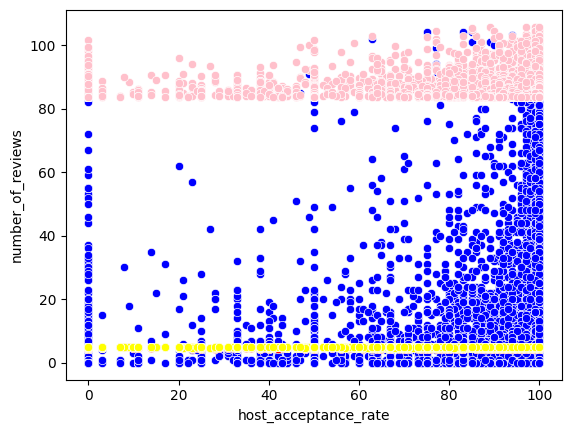

In [186]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews', color="blue", data=p)
sns.scatterplot(x='host_acceptance_rate', y='review_scores_cleanliness', color="red", data=p)
sns.scatterplot(x='host_acceptance_rate', y='review_scores_communication', color="yellow", data=p)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones3', color="pink", data=p)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [187]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.026136174371257925

In [188]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.1616668623164869

Segunda variable df "l"

<Axes: xlabel='review_scores_cleanliness', ylabel='host_acceptance_rate'>

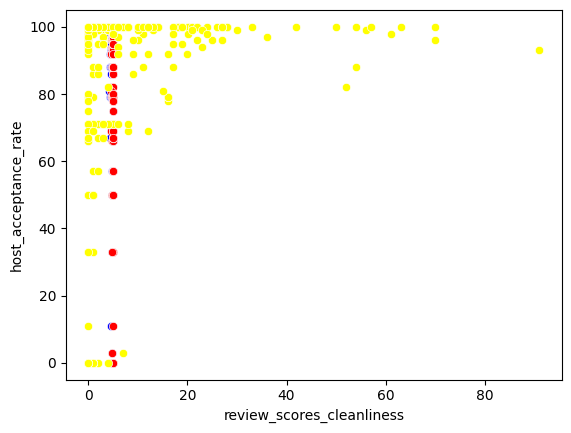

In [189]:
from turtle import color

sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="blue", data=l)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="red", data=l)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="yellow", data=l)

In [190]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= l[['review_scores_cleanliness', 'review_scores_communication','number_of_reviews']]
Var_Dep= l['host_acceptance_rate']

In [191]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [192]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [193]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [194]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness', 'review_scores_communication',
        'number_of_reviews'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([-5.28773116, -7.61456297,  0.40434641]),
 'rank_': 3,
 'singular_': array([229.65931954,   3.14723068,   1.54274374]),
 'intercept_': 143.66507819654504}

**Modelo matemático: y= 0.62534291x1 + 0.01978015x2 + 0.81582765x3 + 1.2098448339476615**

In [195]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.05144207728568373

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: 
y_pred= model.predict(X=l[['review_scores_cleanliness', 'review_scores_communication','number_of_reviews']])
y_pred


In [ ]:
#Insertamos la columna de predicciones en el DataFrame
l.insert(0, 'Predicciones3', y_pred)
l

<Axes: xlabel='host_acceptance_rate', ylabel='review_scores_cleanliness'>

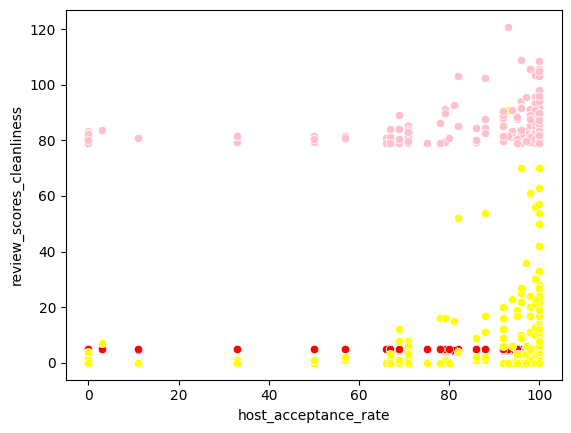

In [198]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='review_scores_cleanliness', color="blue", data=l)
sns.scatterplot(x='host_acceptance_rate', y='review_scores_communication', color="red", data=l)
sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews', color="yellow", data=l)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones3', color="pink", data=l)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [199]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.05144207728568373

In [200]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.2268084594667574